In [ ]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML covid 19/qt_dataset.csv', encoding='latin-1')

In [ ]:
df.head()

,ID,Oxygen,PulseRate,Temperature,Result
0,0,98.0,65.0,95.0,Negative
1,1,96.0,92.0,95.0,Negative
2,2,95.0,92.0,99.0,Negative
3,3,97.0,56.0,96.0,Negative
4,4,88.0,94.0,98.0,Positive


In [ ]:
df.drop(columns=['ID'])

,Oxygen,PulseRate,Temperature,Result
0,98.0,65.0,95.0,Negative
1,96.0,92.0,95.0,Negative
2,95.0,92.0,99.0,Negative
3,97.0,56.0,96.0,Negative
4,88.0,94.0,98.0,Positive
...,...,...,...,...
9997,99.0,56.0,105.0,Negative
9998,92.0,49.0,98.0,Positive
9999,85.0,52.0,99.0,Positive
10000,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
ID,1
Oxygen,0
PulseRate,0
Temperature,0
Result,0


In [ ]:
df['Oxygen'].fillna(df['Oxygen'].mean(), inplace=True)
df['PulseRate'].fillna(df['PulseRate'].mean(), inplace=True)
df['Temperature'].fillna(df['Temperature'].mean(), inplace=True)
df['Result'].fillna(method =('ffill'), inplace=True)

<ipython-input-6-6e84afda7d91>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Oxygen'].fillna(df['Oxygen'].mean(), inplace=True)
<ipython-input-6-6e84afda7d91>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

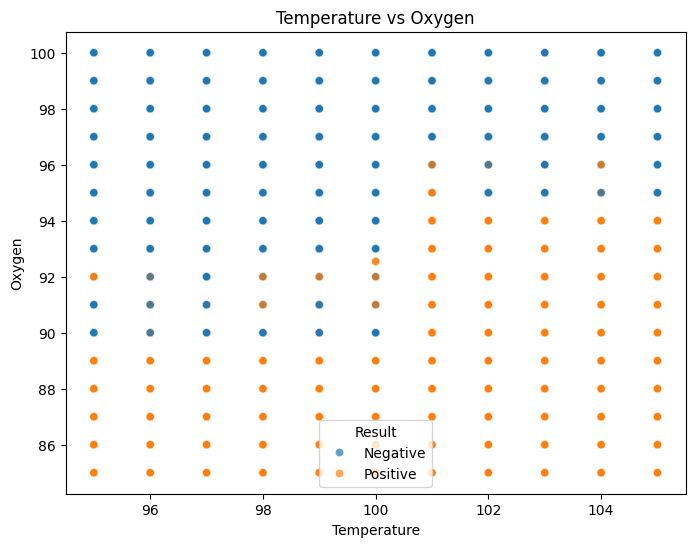

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Temperature"], y=df["Oxygen"], hue=df["Result"], alpha=0.7)
plt.title("Temperature vs Oxygen")
plt.xlabel("Temperature")
plt.ylabel("Oxygen")
plt.show()

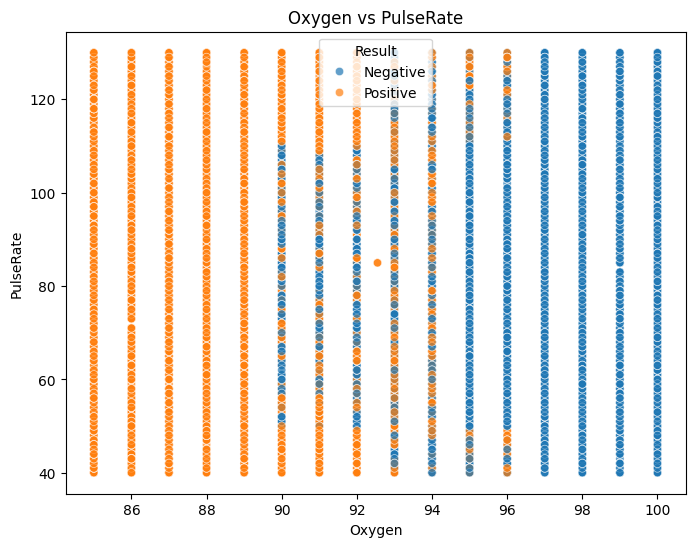

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Oxygen"], y=df["PulseRate"], hue=df["Result"], alpha=0.7)
plt.title("Oxygen vs PulseRate")
plt.xlabel("Oxygen")
plt.ylabel("PulseRate")
plt.show()

In [ ]:
X = df[['Temperature', 'Oxygen', 'PulseRate']]
y = df['Result']

In [ ]:


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
X_train.shape

(7001, 3)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.92


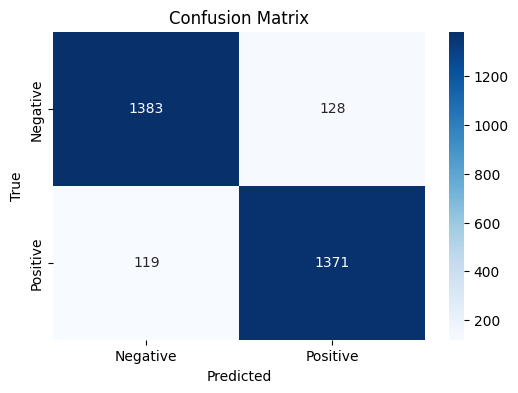

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.96      1.00      0.98      1511
    Positive       1.00      0.96      0.98      1490

    accuracy                           0.98      3001
   macro avg       0.98      0.98      0.98      3001
weighted avg       0.98      0.98      0.98      3001



1. dataset file is not encoded in UTF-8. (endode it to 'latin1')
2. deleted the unnecesary row (ID)
3. fill on missing values.
4. Plot the scatterplot to see relationship between the variables
5. Split dataset into training and testing.
6. Trained the model using LogisticRegression, accuracy of 92%.
6. Trained the model using DecisionTreeClassifier, accuracy of 95%.
6. Train the model using RandomForestClassifier, accuracy of 98%.

